
### **Probability Density Function (PDF)**
The PDF describes the likelihood of a random variable $X $ taking on a particular value $x $, given a mean $\mu $ and standard deviation $\sigma $. The formula is:

$
f_X(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$

- **Key Characteristics**:
  - $x $: Value for which the probability density is calculated.
  - $\mu $: Mean of the distribution.
  - $\sigma^2 $: Variance of the distribution.
  - Represents the shape of the normal distribution for all possible values of $x $.
  - It is a **function of the data** ($x $).

---

### **Likelihood Function**
The likelihood function describes the likelihood of the **parameters** ($\mu, \sigma $) given an observation $z $. For a normal distribution, the likelihood function is:

$
L(\mu, \sigma; z) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(z - \mu)^2}{2\sigma^2}\right)
$

- **Key Characteristics**:
  - $z $: Observed data (fixed value).
  - $\mu, \sigma $: Parameters of the distribution being estimated.
  - Indicates how likely specific parameters ($\mu, \sigma $) are, given the observed data $z $.
  - It is a **function of the parameters** ($\mu, \sigma $).

---


### **The likelihood function for a sample set**

We have a sample of $ n $ independent and identically distributed observations $\{x_1, x_2, \dots, x_n\}$ from a normal distribution with unknown mean $\mu$ and variance $\sigma^2$. The probability density function (PDF) of a single observation $ x_i $ is:

$
f(x_i | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right).
$

The joint probability (likelihood) of observing the sample is the product of individual probabilities since the observations are independent:


$
L(\mu, \sigma^2) = \prod_{i=1}^n f(x_i | \mu, \sigma^2)
= \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right).
$

Simplify the product:

$
L(\mu, \sigma^2) = \left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)^n \exp\left(-\sum_{i=1}^n \frac{(x_i - \mu)^2}{2\sigma^2}\right).
$



## Likelihood
Now if you take a random sample (an observation) from the above graph, let say at $x=-2$, then the $y=0.6$ is the likelihood that this observation generated from the this graph ($\mu=4$ and $\sigma=2$). The value $y=0.6$ is relatively small, which make sense, because if take a random sample from a gaussian distribution the chance that we get closer to the mean is bigger than the chance of being away from that.

$Likelihood(\mu=4,\sigma=2|Observation=-2)$

Refs: [1](https://www.youtube.com/watch?v=pYxNSUDSFH4&t=182s)

---


### Likelihood Function
The joint probability (likelihood) of observing the sample is the product of individual probabilities since the observations are independent:

$
L(\mu, \sigma^2) = \prod_{i=1}^n f(x_i | \mu, \sigma^2)
= \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right).
$

Simplify the product:

$
L(\mu, \sigma^2) = \left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)^n \exp\left(-\sum_{i=1}^n \frac{(x_i - \mu)^2}{2\sigma^2}\right).
$

---


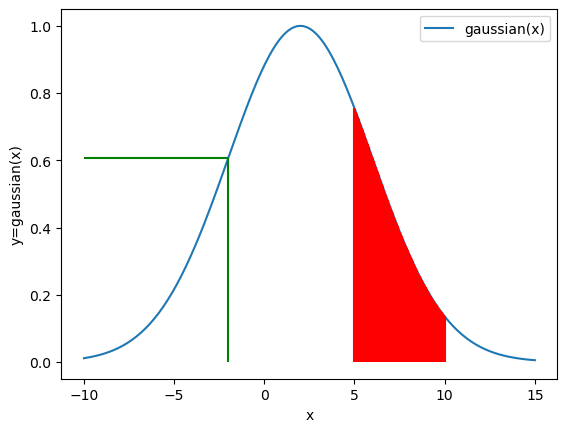

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
mu=2
sig=4

x1=-10
x2=15
number_of_samples=200
x=np.linspace(x1,x2,number_of_samples)
y=gaussian(x, mu, sig)
plt.xlabel("x")
plt.ylabel("y=gaussian(x)")
line_1,=plt.plot(x,y,label='gaussian(x)')
plt.legend()
plt.legend(handles=[line_1])

a=5
b=10
x=np.linspace(a,b,number_of_samples)
y_min=np.zeros_like(x)
y_max=gaussian(x, mu, sig)
plt.vlines(x,y_min,y_max,colors='red')
observation=-2
plt.vlines(observation,0,gaussian(observation, mu, sig),colors='green')
plt.hlines(gaussian(observation, mu, sig),x1,observation,colors='green')
plt.show()


The red ares=$P(5<x<10|\mu=4,\sigma=2)$

## Log Likelihood
Since we assume the obeservations are independent of each other and for independent probabilites we have:

$P(x_1,x_2|\theta)=P(x_1|\theta).P(x_2|\theta)$

$x_i\perp x_j \text{indipendent}$ 

Therefore for likelihood we would also have:
$L(distribution|observeation1,observeation2)=L(distribution|observeation1)L(distribution|observeation2)$

Since Likelihood values are small and multiplying them will make them smaller which might may round to zero in  computation, we use the **log** function. The **log** function will also truns multipication into summation and power into multipication.



###  Log-Likelihood Function
Taking the natural logarithm of the likelihood function simplifies the computation, especially for maximizing it:

$
\ell(\mu, \sigma^2) = \ln L(\mu, \sigma^2).
$

Using the expression for $ L(\mu, \sigma^2) $, we get:

$
\ell(\mu, \sigma^2) = \ln \left(\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)^n \exp\left(-\sum_{i=1}^n \frac{(x_i - \mu)^2}{2\sigma^2}\right)\right).
$

Separate the logarithm terms:

$
\ell(\mu, \sigma^2) = n \ln\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right) - \frac{1}{2\sigma^2} \sum_{i=1}^n (x_i - \mu)^2.
$

Expand $ \ln\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right) $:

$
\ell(\mu, \sigma^2) = n \left(-\frac{1}{2} \ln(2\pi) - \frac{1}{2} \ln(\sigma^2)\right) - \frac{1}{2\sigma^2} \sum_{i=1}^n (x_i - \mu)^2.
$

Combine terms:

$
\ell(\mu, \sigma^2) = -\frac{n}{2} \ln(2\pi) - \frac{n}{2} \ln(\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^n (x_i - \mu)^2.
$

---



# Likelihood ratio
We usually don't use likelihood function but we compare them :
$L(\theta1|x)>L(\theta2|x)?$

Since **log** function is a monotonically increasig function, when the likelihood increase/ decrease, the log will also increase/ decrease, so we compare log of likelihood 
# Odds ratio
Odds provide a measure of the likelihood of a particular outcome. The odds of rolling a 6 is 1:5, The odds of rolling either a 5 or 6 is 2:4.


$odds=\frac{P(event)}{1-P(event)}$
# Log odds

The logit function or the log-odds is the logarithm of the odds. If $p$ is a probability, 

${\displaystyle \operatorname {logit} (p)=\log \left({\frac {p}{1-p}}\right)=\log(p)-\log(1-p)=-\log \left({\frac {1}{p}}-1\right)\,.}$


## Marginal likelihood

A marginal likelihood function (integrated likelihood), is a likelihood function in which some parameter variables have been marginalized. 

### In the context of Bayesian statistics
Given a set of independent identically distributed data points ${\displaystyle \mathbf {X} =(x_{1},\ldots ,x_{n}),}$, where $x_{i}\sim p(x_{i}|\theta )$ according to some probability distribution parameterized by $\theta$ , where $\theta$  itself is a random variable described by a distribution, i.e. ${\displaystyle \theta \sim p(\theta \mid \alpha ),}$ the marginal likelihood in general asks what the probability ${\displaystyle p(\mathbf {X} \mid \alpha )}$ is, where $\theta$  has been marginalized out (integrated out): 


${\displaystyle p(\mathbf {X} \mid \alpha )=\int _{\theta }p(\mathbf {X} \mid \theta )\,p(\theta \mid \alpha )\ \operatorname {d} \!\theta }$

###  In classical statistics
In In classical statistics, the concept of marginal likelihood occurs instead in the context of a joint parameter ${\displaystyle \theta =(\psi ,\lambda )}$, where $\psi$  is the actual parameter of interest, and $\lambda$  is a non-interesting nuisance parameter.


We know that:

$P(B|C)=\sum_{i} P(B|A_i,C)P(A_i|C) $

And we also know 

${\mathcal {L}}(\theta|X)=p(X|\theta)=p_{\theta }(X)$







by marginalizing out $\lambda$ :

${\displaystyle {\mathcal {L}}(\psi ;\mathbf {X} )=p(\mathbf {X} \mid \psi )=\int _{\lambda }p(\mathbf {X} \mid \lambda ,\psi )\,p(\lambda \mid \psi )\ \operatorname {d} \!\lambda }$


# Maximum Likelihood Estimation (MLE)
Maximum Likelihood Estimation (MLE) is a statistical method used to estimate the parameters of a statistical model. It is based on the principle of finding the parameter values that make the observed data most likely. The "likelihood" refers to the probability of observing the given data under a specific model, as a function of the model parameters. MLE seeks to maximize this likelihood, hence the name "maximum likelihood."

Here's a step-by-step breakdown of how MLE works:




### Computing the MLE for a Normal Distribution

Suppose you have a dataset consisting of $n$ independent observations from a normal distribution with unknown mean $\mu$ and known variance $\sigma^2$. The likelihood function for this model, given the data $x_1, x_2, ..., x_n$, is proportional to:

$
L(\mu; x_1, x_2, ..., x_n) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x_i - \mu)^2}{2\sigma^2}}
$

The log-likelihood function is:

$
\log L(\mu; x_1, x_2, ..., x_n) = -\frac{n}{2}\log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2
$

Maximizing this log-likelihood with respect to $\mu$ (by taking the derivative and setting it to zero) leads to the MLE of $\mu$, which is the sample mean:

$
\hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} x_i
$

This result shows that, under the model assumptions, the sample mean is the value of $\mu$ that makes the observed data most likely.



The binomial distribution is a discrete probability distribution that describes the number of successes in a fixed number of independent Bernoulli trials, each with the same probability of success. The probability mass function (PMF) of the binomial distribution, for obtaining $k$ successes out of $n$ trials, is given by:

$
P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}
$

where:
- $X$ is the random variable representing the number of successes,
- $k = 0, 1, 2, \ldots, n$ is the number of successes,
- $n$ is the number of trials,
- $p$ is the probability of success on any given trial, and
- $\binom{n}{k}$ is the binomial coefficient, which calculates the number of ways to choose $k$ successes from $n$ trials, and is given by $\binom{n}{k} = \frac{n!}{k!(n-k)!}$.

### Computing the MLE for a Binomial Distribution

To compute the Maximum Likelihood Estimation (MLE) for the binomial distribution's parameter $p$, given a set of $n$ trials and $k$ observed successes, you follow these steps:

1. **Likelihood Function**: The likelihood function for the binomial distribution, given the observed data, is the probability of observing $k$ successes in $n$ trials, which is:

   $
   L(p; k, n) = \binom{n}{k} p^k (1 - p)^{n - k}
   $

   Since $\binom{n}{k}$ does not depend on $p$, it can be treated as a constant in the maximization process.

2. **Log-Likelihood Function**: The log-likelihood function is the natural logarithm of the likelihood function, which simplifies the multiplication into addition, making it easier to differentiate:

   $
   \log L(p; k, n) = \log\binom{n}{k} + k\log(p) + (n - k)\log(1 - p)
   $

3. **Maximize the Log-Likelihood**: To find the MLE of $p$, you take the derivative of the log-likelihood function with respect to $p$, set it to zero, and solve for $p$. This gives:

   $
   \frac{d}{dp}\log L(p; k, n) = \frac{k}{p} - \frac{n - k}{1 - p} = 0
   $

4. **Solving for $p$**: Solving the above equation for $p$ yields the MLE of $p$:

   $
   \hat{p} = \frac{k}{n}
   $

This result intuitively makes sense: the MLE for the probability of success $p$ in a binomial distribution is simply the ratio of the number of observed successes $k$ to the total number of trials $n$. This estimation method leverages the observed data to directly estimate the underlying probability of success in the binomial setting.




###  Maximizing the Log-Likelihood
To find the maximum likelihood estimators (MLE) for $\mu$ and $\sigma^2$, we maximize $\ell(\mu, \sigma^2)$ with respect to $\mu$ and $\sigma^2$.

#### (i) Derivative w.r.t. $\mu$:
Differentiate $\ell(\mu, \sigma^2)$ with respect to $\mu$:

$
\frac{\partial \ell}{\partial \mu} = \frac{1}{\sigma^2} \sum_{i=1}^n (x_i - \mu).
$

Set $\frac{\partial \ell}{\partial \mu} = 0$:

$
\sum_{i=1}^n (x_i - \mu) = 0 \quad \Rightarrow \quad \mu = \frac{1}{n} \sum_{i=1}^n x_i.
$

Thus, the MLE for $\mu$ is the sample mean $\hat{\mu} = \bar{x}$.

#### (ii) Derivative w.r.t. $\sigma^2$:
Differentiate $\ell(\mu, \sigma^2)$ with respect to $\sigma^2$:

$
\frac{\partial \ell}{\partial \sigma^2} = -\frac{n}{2\sigma^2} + \frac{1}{2\sigma^4} \sum_{i=1}^n (x_i - \mu)^2.
$

Set $\frac{\partial \ell}{\partial \sigma^2} = 0$:

$
-\frac{n}{2\sigma^2} + \frac{1}{2\sigma^4} \sum_{i=1}^n (x_i - \mu)^2 = 0.
$

Multiply through by $2\sigma^4$:

$
-n\sigma^2 + \sum_{i=1}^n (x_i - \mu)^2 = 0 \quad \Rightarrow \quad \sigma^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2.
$

Thus, the MLE for $\sigma^2$ is:

$
\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^2.
$

---

### Conclusion
The likelihood function is:

$
L(\mu, \sigma^2) = \left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)^n \exp\left(-\frac{1}{2\sigma^2} \sum_{i=1}^n (x_i - \mu)^2\right).
$

The log-likelihood function is:

$
\ell(\mu, \sigma^2) = -\frac{n}{2} \ln(2\pi) - \frac{n}{2} \ln(\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^n (x_i - \mu)^2.
$

The MLEs are:

$
\hat{\mu} = \frac{1}{n} \sum_{i=1}^n x_i, \quad \hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^2.
$

## Example
### Normal Distribution Example

Suppose we have a small dataset of five measurements: $X = \{2, 3, 5, 6, 7\}$, and we know these measurements come from a normal distribution with an unknown mean $\mu$ and a known variance $\sigma^2 = 4$ (hence, $\sigma = 2$).

#### Task: Estimate $\mu$ using MLE.

1. **Model Specification**: Normal distribution with unknown $\mu$ and known $\sigma^2 = 4$.
2. **Likelihood Function**: Not explicitly needed for the calculation since the MLE for $\mu$ in a normal distribution with known variance is the sample mean.
3. **Maximize the Likelihood**: The MLE for $\mu$, $\hat{\mu}$, is the average of the sample:

   $
   \hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} x_i
   $

4. **Calculation**:

   $
   \hat{\mu} = \frac{2 + 3 + 5 + 6 + 7}{5}
   $

Let's compute this:

$ \hat{\mu} = \frac{2 + 3 + 5 + 6 + 7}{5} $

### Binomial Distribution Example

Imagine we have conducted 10 trials of a binary experiment (e.g., flipping a coin), and we observed 7 successes (e.g., getting heads).

#### Task: Estimate the probability of success $p$ using MLE.

1. **Model Specification**: Binomial distribution with $n = 10$ trials and $k = 7$ successes.
2. **Likelihood and Log-Likelihood Function**: Not explicitly needed for direct calculation as the MLE for $p$ is the ratio of successes to trials.
3. **Maximize the Likelihood**: The MLE for $p$, $\hat{p}$, is given by:

   $
   \hat{p} = \frac{k}{n}
   $

4. **Calculation**:

   $
   \hat{p} = \frac{7}{10}
   $

For the normal distribution example, let's calculate the MLE of $\mu$ explicitly. For the binomial distribution example, the calculation is straightforward but let's formalize it.

For the **normal distribution example**, the MLE for the mean $\mu$ is $\hat{\mu} = 4.6$. This estimate suggests that, given our sample, the most likely mean value of the underlying normal distribution is 4.6.

For the **binomial distribution example**, the MLE for the probability of success $p$ is $\hat{p} = 0.7$. This result indicates that, based on observing 7 successes in 10 trials, the most likely probability of success in each trial is 0.7.

These examples illustrate how MLE is used to estimate parameters of distributions based on observed data, providing intuitive and statistically sound estimates.


Refs: [1](https://www.youtube.com/watch?v=sHTK-jKrRuw)

In [ ]:
# Normal distribution example calculations
X = [2, 3, 5, 6, 7] # Data points
mu_hat = sum(X) / len(X) # MLE for mu

# Binomial distribution example
n = 10 # Number of trials
k = 7 # Number of successes
p_hat = k / n # MLE for p

mu_hat, p_hat
